<h1 style = 'color: green'>Case Study:- Telecom Churn Case</h1>

<b>Group Members: Raj Kansara, Shaju VJ</b>

#### Importing All Required Libraries

In [87]:
import warnings
warnings.filterwarnings('ignore')

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

# A. Understanding the Data Set:

### Loading the 'train' and 'test' dataset:

In [89]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
#Look into the dataset
train.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,...,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,...,0,0,NaN,1.0,NaN,710,0.0,0.0,0.0,0
2,2,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,60.806,103.176,...,0,0,NaN,NaN,NaN,882,0.0,0.0,0.0,0
3,3,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,156.362,205.260,...,0,0,NaN,NaN,NaN,982,0.0,0.0,0.0,0
4,4,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,240.708,128.191,...,1,0,1.0,1.0,1.0,647,0.0,0.0,0.0,0


In [90]:
#Checking the dimensions of the dataset

train.shape

(69999, 172)

In [91]:
test.shape

(30000, 171)

In [92]:
#Detail Info about the data

train.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 172 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    id                        int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    arpu_6                    float64
 9    arpu_7                    float64
 10   arpu_8                    float64
 11   onnet_mou_6               float64
 12   onnet_mou_7               float64
 13   onnet_mou_8               float64
 14   offnet_mou_6              float64
 15   offnet_mou_7              float64
 16   offnet_mou_8              float64
 17   roam_ic_mou_6             float64
 18   roam_ic_mou_7             float64
 19   roam_ic_mou_8             float64
 20   roam

In [93]:
#Getting to know Numeric Data in dataset

train.describe()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
count,69999.000000,69999.0,69297.0,69297.0,69297.0,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,...,69999.000000,69999.000000,17568.000000,17865.000000,18417.000000,69999.000000,69999.000000,69999.000000,69999.00000,69999.000000
mean,34999.000000,109.0,0.0,0.0,0.0,283.134365,278.185912,278.858826,133.153275,133.894438,...,0.081444,0.085487,0.916325,0.909544,0.890319,1220.639709,68.108597,65.935830,60.07674,0.101887
std,20207.115084,0.0,0.0,0.0,0.0,334.213918,344.366927,351.924315,299.963093,311.277193,...,0.634547,0.680035,0.276907,0.286842,0.312501,952.426321,269.328659,267.899034,257.22681,0.302502
min,0.000000,109.0,0.0,0.0,0.0,-2258.709000,-1289.715000,-945.808000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.00000,0.000000
25%,17499.500000,109.0,0.0,0.0,0.0,93.581000,86.714000,84.095000,7.410000,6.675000,...,0.000000,0.000000,1.000000,1.000000,1.000000,468.000000,0.000000,0.000000,0.00000,0.000000
50%,34999.000000,109.0,0.0,0.0,0.0,197.484000,191.588000,192.234000,34.110000,32.280000,...,0.000000,0.000000,1.000000,1.000000,1.000000,868.000000,0.000000,0.000000,0.00000,0.000000
75%,52498.500000,109.0,0.0,0.0,0.0,370.791000,365.369500,369.909000,119.390000,115.837500,...,0.000000,0.000000,1.000000,1.000000,1.000000,1813.000000,0.000000,0.000000,0.00000,0.000000
max,69998.000000,109.0,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,7376.710000,8157.780000,...,33.000000,41.000000,1.000000,1.000000,1.000000,4337.000000,12916.220000,9165.600000,11166.21000,1.000000


In [94]:
#Checking null rows
print("Number of empty rows:", train.isna().all(axis=1).sum())

#Getting null values coloumn wise
train_null = train.isnull().sum() 
print(train_null[train_null>0])

Number of empty rows: 0
loc_og_t2o_mou            702
std_og_t2o_mou            702
loc_ic_t2o_mou            702
last_date_of_month_7      399
last_date_of_month_8      733
                        ...  
night_pck_user_7        52134
night_pck_user_8        51582
fb_user_6               52431
fb_user_7               52134
fb_user_8               51582
Length: 125, dtype: int64


In [95]:
#Checking null rows
print("Number of empty rows:", test.isna().all(axis=1).sum())

#Getting null values coloumn wise
test_null = test.isna().sum()
print(test_null[test_null>0])

Number of empty rows: 0
loc_og_t2o_mou            316
std_og_t2o_mou            316
loc_ic_t2o_mou            316
last_date_of_month_7      202
last_date_of_month_8      367
                        ...  
night_pck_user_7        22294
night_pck_user_8        22078
fb_user_6               22415
fb_user_7               22294
fb_user_8               22078
Length: 125, dtype: int64


# B. Preparing the Data & Standardizing Values

### Checking the Missing Values in train and test Dataset

In [96]:
print(train.isna().sum()[train.isna().sum()>0].count())
print(test.isna().sum()[test.isna().sum()>0].count())

125
125


In [97]:
# Finding the 'Missing Value Percentage' for each column:
print("Training Data")
missing_values_percentage = (train.isna().sum() / train.shape[0])*100
print(missing_values_percentage[missing_values_percentage>50])

print("Testing Data")
missing_values_percentage_test = (test.isna().sum() / test.shape[0])*100
print(missing_values_percentage_test[missing_values_percentage_test>50])


Training Data
date_of_last_rech_data_6    74.902499
date_of_last_rech_data_7    74.478207
date_of_last_rech_data_8    73.689624
total_rech_data_6           74.902499
total_rech_data_7           74.478207
total_rech_data_8           73.689624
max_rech_data_6             74.902499
max_rech_data_7             74.478207
max_rech_data_8             73.689624
count_rech_2g_6             74.902499
count_rech_2g_7             74.478207
count_rech_2g_8             73.689624
count_rech_3g_6             74.902499
count_rech_3g_7             74.478207
count_rech_3g_8             73.689624
av_rech_amt_data_6          74.902499
av_rech_amt_data_7          74.478207
av_rech_amt_data_8          73.689624
arpu_3g_6                   74.902499
arpu_3g_7                   74.478207
arpu_3g_8                   73.689624
arpu_2g_6                   74.902499
arpu_2g_7                   74.478207
arpu_2g_8                   73.689624
night_pck_user_6            74.902499
night_pck_user_7            74.47820

### For some Columns, since more than 50% missing records is a significant number, so we will try to impute values in this column.

#### Treating categorical variable first

Missing values can be imputed with '-1' where -1 can be treated as a new category.

In [98]:
categorical_vars = ["night_pck_user_6", "night_pck_user_7", "night_pck_user_8", "fb_user_6", "fb_user_7", "fb_user_8"]

for var in categorical_vars:
    train[var].fillna(value=-1, inplace=True)
    test[var].fillna(value=-1, inplace=True)

#### Creating dummy columns for the categorical variables

In [99]:
night_pck_user_6_s = pd.get_dummies(train['night_pck_user_6'],prefix="night6",drop_first=True)
night_pck_user_7_s = pd.get_dummies(train['night_pck_user_7'],prefix="night7",drop_first=True)
night_pck_user_8_s = pd.get_dummies(train['night_pck_user_8'],prefix="night8",drop_first=True)

fb_user_6_s = pd.get_dummies(train['fb_user_6'],prefix="fb6", drop_first=True)
fb_user_7_s = pd.get_dummies(train['fb_user_7'],prefix="fb7",drop_first=True)
fb_user_8_s = pd.get_dummies(train['fb_user_8'],prefix="fb8",drop_first=True)

train = pd.concat([train,night_pck_user_6_s],axis=1)
train = pd.concat([train,night_pck_user_7_s],axis=1)
train = pd.concat([train,night_pck_user_8_s],axis=1)

train = pd.concat([train,fb_user_6_s],axis=1)
train = pd.concat([train,fb_user_7_s],axis=1)
train = pd.concat([train,fb_user_8_s],axis=1)

night_pck_user_6_s = pd.get_dummies(test['night_pck_user_6'],prefix="night6",drop_first=True)
night_pck_user_7_s = pd.get_dummies(test['night_pck_user_7'],prefix="night7",drop_first=True)
night_pck_user_8_s = pd.get_dummies(test['night_pck_user_8'],prefix="night8",drop_first=True)

fb_user_6_s = pd.get_dummies(test['fb_user_6'],prefix="fb6", drop_first=True)
fb_user_7_s = pd.get_dummies(test['fb_user_7'],prefix="fb7",drop_first=True)
fb_user_8_s = pd.get_dummies(test['fb_user_8'],prefix="fb8",drop_first=True)

test = pd.concat([test,night_pck_user_6_s],axis=1)
test = pd.concat([test,night_pck_user_7_s],axis=1)
test = pd.concat([test,night_pck_user_8_s],axis=1)

test = pd.concat([test,fb_user_6_s],axis=1)
test = pd.concat([test,fb_user_7_s],axis=1)
test = pd.concat([test,fb_user_8_s],axis=1)

# drop all categorial columns
train = train.drop(['fb_user_6', 'fb_user_7', 'fb_user_8', 'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8'], 1)
test = test.drop(['fb_user_6', 'fb_user_7', 'fb_user_8', 'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8'], 1)

In [100]:
print("Training Data")
missing_values_percentage = (train.isna().sum() / train.shape[0])*100
print(missing_values_percentage[missing_values_percentage>50])
print("---------------------------------------------------------")
print("Testing Data")
missing_values_percentage_test = (test.isna().sum() / test.shape[0])*100
print(missing_values_percentage_test[missing_values_percentage_test>50])


Training Data
date_of_last_rech_data_6    74.902499
date_of_last_rech_data_7    74.478207
date_of_last_rech_data_8    73.689624
total_rech_data_6           74.902499
total_rech_data_7           74.478207
total_rech_data_8           73.689624
max_rech_data_6             74.902499
max_rech_data_7             74.478207
max_rech_data_8             73.689624
count_rech_2g_6             74.902499
count_rech_2g_7             74.478207
count_rech_2g_8             73.689624
count_rech_3g_6             74.902499
count_rech_3g_7             74.478207
count_rech_3g_8             73.689624
av_rech_amt_data_6          74.902499
av_rech_amt_data_7          74.478207
av_rech_amt_data_8          73.689624
arpu_3g_6                   74.902499
arpu_3g_7                   74.478207
arpu_3g_8                   73.689624
arpu_2g_6                   74.902499
arpu_2g_7                   74.478207
arpu_2g_8                   73.689624
dtype: float64
---------------------------------------------------------
T

#### As observed from above, columns such as total_rech_data_6,  total_rech_data_7,  total_rech_data_8, av_rech_amt_data_6, av_rech_amt_data_7, av_rech_amt_data_8 are useful for determining high value customers so we can't drop these columns.

#### So we will impute these columns  with appropriate values after looking into distribution plot

In [101]:
imp_cols=['total_rech_data_6','total_rech_data_7','total_rech_data_8','av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8']
train[imp_cols].describe()

,total_rech_data_6,total_rech_data_7,total_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8
count,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000
mean,2.467612,2.679989,2.652441,192.831096,201.455940,196.815792
std,2.794610,3.073472,3.101265,190.623115,198.346141,192.280532
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000,82.000000,92.000000,84.000000
50%,1.000000,2.000000,1.000000,154.000000,154.000000,154.000000
75%,3.000000,3.000000,3.000000,252.000000,252.000000,252.000000
max,61.000000,54.000000,60.000000,5920.000000,4365.000000,4076.000000


(array([1.0055e+04, 6.0040e+03, 1.1710e+03, 6.6100e+02, 2.7400e+02,
        9.0000e+01, 5.8000e+01, 3.1000e+01, 3.0000e+01, 1.4000e+01,
        6.0000e+00, 9.0000e+00, 1.0000e+00, 5.0000e+00, 1.0000e+00,
        2.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 2.0000e+00]),
 array([1.000e+00, 1.640e+02, 3.270e+02, 4.900e+02, 6.530e+02, 8.160e+02,
        9.790e+02, 1.142e+03, 1.305e+03, 1.468e+03, 1.631e+03, 1.794e+03,
        1.957e+03, 2.120e+03, 2.283e+03, 2.446e+03, 2.609e+03, 2.772e+03,
        2.935e+03, 3.098e+03, 3.261e+03, 3.424e+03, 3.587e+03, 3.750e+03,
        3.913e+03, 4.076e+03]),
 <BarContainer object of 25 artists>)

<Figure size 432x288 with 0 Axes>

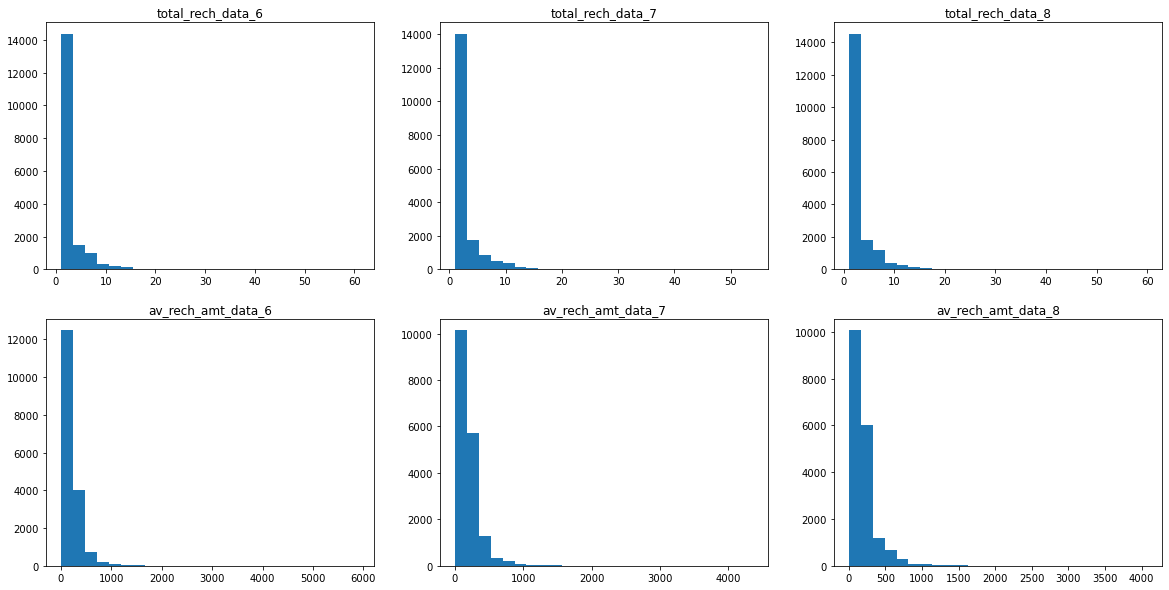

In [102]:
## Creating distribution plots to get proper values with which we can impute
plt.figure(1)
fig, ax = plt.subplots(figsize=(20,10))
plt.subplot(2,3,1)
plt.title("total_rech_data_6")
plt.hist(train.total_rech_data_6.dropna(),bins=25)

# total_rech_data_7
plt.subplot(2,3,2)
plt.title("total_rech_data_7")
plt.hist(train.total_rech_data_7.dropna(),bins=25)

# av_rech_amt_data_6
plt.subplot(2,3,4)
plt.title("av_rech_amt_data_6")
plt.hist(train.av_rech_amt_data_6.dropna(),bins=25)

# total_rech_data_7
plt.subplot(2,3,5)
plt.title("av_rech_amt_data_7")
plt.hist(train.av_rech_amt_data_7.dropna(),bins=25)

# total_rech_data_7
plt.subplot(2,3,3)
plt.title("total_rech_data_8")
plt.hist(train.total_rech_data_8.dropna(),bins=25)

# total_rech_data_7
plt.subplot(2,3,6)
plt.title("av_rech_amt_data_8")
plt.hist(train.av_rech_amt_data_8.dropna(),bins=25)

As observed from the above table and distribution plot of numeric variable, the min value is 1 and here missing value means no recharge done this month. So we can replace those missing values with 0.

In [103]:
train.total_rech_data_6.fillna(value=0, inplace=True)
train.total_rech_data_7.fillna(value=0, inplace=True)
train.total_rech_data_8.fillna(value=0, inplace=True)

train.av_rech_amt_data_6.fillna(value=0, inplace=True)
train.av_rech_amt_data_7.fillna(value=0, inplace=True)
train.av_rech_amt_data_8.fillna(value=0, inplace=True)

test.total_rech_data_6.fillna(value=0, inplace=True)
test.total_rech_data_7.fillna(value=0, inplace=True)
test.total_rech_data_8.fillna(value=0, inplace=True)

test.av_rech_amt_data_6.fillna(value=0, inplace=True)
test.av_rech_amt_data_7.fillna(value=0, inplace=True)
test.av_rech_amt_data_8.fillna(value=0, inplace=True)

In [104]:
print("Training Data")
missing_values_percentage = (train.isna().sum() / train.shape[0])*100
print(missing_values_percentage[missing_values_percentage>50])
print("---------------------------------------------------------")
print("Testing Data")
missing_values_percentage_test = (test.isna().sum() / test.shape[0])*100
print(missing_values_percentage_test[missing_values_percentage_test>50])

Training Data
date_of_last_rech_data_6    74.902499
date_of_last_rech_data_7    74.478207
date_of_last_rech_data_8    73.689624
max_rech_data_6             74.902499
max_rech_data_7             74.478207
max_rech_data_8             73.689624
count_rech_2g_6             74.902499
count_rech_2g_7             74.478207
count_rech_2g_8             73.689624
count_rech_3g_6             74.902499
count_rech_3g_7             74.478207
count_rech_3g_8             73.689624
arpu_3g_6                   74.902499
arpu_3g_7                   74.478207
arpu_3g_8                   73.689624
arpu_2g_6                   74.902499
arpu_2g_7                   74.478207
arpu_2g_8                   73.689624
dtype: float64
---------------------------------------------------------
Testing Data
date_of_last_rech_data_6    74.716667
date_of_last_rech_data_7    74.313333
date_of_last_rech_data_8    73.593333
max_rech_data_6             74.716667
max_rech_data_7             74.313333
max_rech_data_8           

### Dropping all other columns with more than 50% missing values

In [105]:
drop_list = missing_values_percentage[missing_values_percentage>=50]
drop_list.index

Index(['date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8', 'max_rech_data_6', 'max_rech_data_7',
       'max_rech_data_8', 'count_rech_2g_6', 'count_rech_2g_7',
       'count_rech_2g_8', 'count_rech_3g_6', 'count_rech_3g_7',
       'count_rech_3g_8', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_2g_6',
       'arpu_2g_7', 'arpu_2g_8'],
      dtype='object')

In [106]:
train=train.drop(columns=drop_list.index)
test=test.drop(columns=drop_list.index)

In [107]:
print("Training Data")
missing_values_percentage = (train.isna().sum() / train.shape[0])*100
print(missing_values_percentage[missing_values_percentage>2])
print("---------------------------------------------------------")
print("Testing Data")
missing_values_percentage_test = (test.isna().sum() / test.shape[0])*100
print(missing_values_percentage_test[missing_values_percentage_test>2])

Training Data
onnet_mou_6            3.954342
onnet_mou_7            3.838626
onnet_mou_8            5.290076
offnet_mou_6           3.954342
offnet_mou_7           3.838626
                         ...   
isd_ic_mou_8           5.290076
ic_others_6            3.954342
ic_others_7            3.838626
ic_others_8            5.290076
date_of_last_rech_8    3.515765
Length: 88, dtype: float64
---------------------------------------------------------
Testing Data
onnet_mou_6            3.896667
onnet_mou_7            3.906667
onnet_mou_8            5.583333
offnet_mou_6           3.896667
offnet_mou_7           3.906667
                         ...   
isd_ic_mou_8           5.583333
ic_others_6            3.896667
ic_others_7            3.906667
ic_others_8            5.583333
date_of_last_rech_8    3.870000
Length: 88, dtype: float64


In [108]:
train.shape

(69999, 160)

## Filtering high valued customers 

Here we will derive some important columns from existing columns and remove the old ones.

In [109]:
train["total_rech_data_amt_6"] = train["total_rech_data_6"]*train['av_rech_amt_data_6']
train["total_rech_data_amt_7"] = train["total_rech_data_7"]*train['av_rech_amt_data_7']
train["total_rech_data_amt_8"] = train["total_rech_data_8"]*train['av_rech_amt_data_8']

test["total_rech_data_amt_6"] = test["total_rech_data_6"]*test['av_rech_amt_data_6']
test["total_rech_data_amt_7"] = test["total_rech_data_7"]*test['av_rech_amt_data_7']
test["total_rech_data_amt_8"] = test["total_rech_data_8"]*test['av_rech_amt_data_8']


drop_data_columns = ["total_rech_data_6", "total_rech_data_7", "total_rech_data_8",'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8']
train.drop(drop_data_columns, axis=1, inplace=True)
test.drop(drop_data_columns, axis=1, inplace=True)

In [110]:
avg_rech_amt = (train["total_rech_amt_6"] + train["total_rech_data_amt_6"] + train["total_rech_amt_7"] + train["total_rech_data_amt_7"] + train["total_rech_amt_8"] + train["total_rech_data_amt_8"]) / 3.0

avg_rech_amt_60pc = np.percentile(avg_rech_amt,60.0)
print('60 percentile of 3 months avg recharge amount: ', avg_rech_amt_60pc)

train = train[avg_rech_amt >= avg_rech_amt_60pc]
print('Dataframe Shape: ', train.shape)

60 percentile of 3 months avg recharge amount:  365.3333333333333
Dataframe Shape:  (28014, 157)


## Columns with no variance, for dropping

In [111]:
# Identify columns that have no varience
train_unique_count = train.nunique().sort_values(ascending=False)
train_unique_count

id                      28014
arpu_7                  27060
arpu_6                  26825
arpu_8                  26718
total_og_mou_7          21990
                        ...  
std_ic_t2o_mou_6            1
last_date_of_month_7        1
std_og_t2c_mou_7            1
std_og_t2c_mou_8            1
circle_id                   1
Length: 157, dtype: int64

In [112]:
#Finding columsn with all null values
train_unique_count[train_unique_count == 0]

Series([], dtype: int64)

In [113]:
drop_list

date_of_last_rech_data_6    74.902499
date_of_last_rech_data_7    74.478207
date_of_last_rech_data_8    73.689624
max_rech_data_6             74.902499
max_rech_data_7             74.478207
max_rech_data_8             73.689624
count_rech_2g_6             74.902499
count_rech_2g_7             74.478207
count_rech_2g_8             73.689624
count_rech_3g_6             74.902499
count_rech_3g_7             74.478207
count_rech_3g_8             73.689624
arpu_3g_6                   74.902499
arpu_3g_7                   74.478207
arpu_3g_8                   73.689624
arpu_2g_6                   74.902499
arpu_2g_7                   74.478207
arpu_2g_8                   73.689624
dtype: float64

In [114]:
# Find columns with all same entries
drop_list=[]
train_unique_count_drop = train_unique_count[train_unique_count == 1]
drop_list += list(train_unique_count_drop.index)

train.drop(drop_list, axis=1, inplace=True)
test.drop(drop_list, axis=1, inplace=True)

print('Dataframe Train Shape: ', train.shape)
print('Dataframe Test Shape: ', test.shape)

Dataframe Train Shape:  (28014, 144)
Dataframe Test Shape:  (30000, 143)


### Removing Rows with more null values

In [115]:
rows_missing = train.isnull().sum(axis=1)
rows_missing[rows_missing > 0]

33       54
54       27
135      27
177      27
183      28
         ..
69786    27
69792    27
69802     1
69841     1
69886    28
Length: 1517, dtype: int64

In [116]:
rows_missing = test.isnull().sum(axis=1)
rows_missing[rows_missing > 0]

5        28
9        54
12       28
15       27
29       27
         ..
29958     1
29967     1
29977    54
29986    56
29988    27
Length: 3539, dtype: int64

In [117]:
# drop rows with missing values greater >= 27
train = train[train.isnull().sum(axis=1) < 27]
print('Train Dataframe Shape after dropping rows: ', train.shape);

Train Dataframe Shape after dropping rows:  (26737, 144)


In [118]:
print("Training Data")
missing_values_percentage = (train.isna().sum() / train.shape[0])*100
print(missing_values_percentage[missing_values_percentage>0])
print("---------------------------------------------------------")
print("Testing Data")
missing_values_percentage_test = (test.isna().sum() / test.shape[0])*100
print(missing_values_percentage_test[missing_values_percentage_test>0])

Training Data
date_of_last_rech_6    0.216928
date_of_last_rech_7    0.228148
date_of_last_rech_8    0.508658
dtype: float64
---------------------------------------------------------
Testing Data
onnet_mou_6            3.896667
onnet_mou_7            3.906667
onnet_mou_8            5.583333
offnet_mou_6           3.896667
offnet_mou_7           3.906667
                         ...   
ic_others_7            3.906667
ic_others_8            5.583333
date_of_last_rech_6    1.686667
date_of_last_rech_7    1.776667
date_of_last_rech_8    3.870000
Length: 84, dtype: float64


### Deriving some meaningful columns from above list of dates which has some missing values

In [119]:
date_vars = ["date_of_last_rech_6",  "date_of_last_rech_7", "date_of_last_rech_8"]
# convert to datetime
for col in date_vars:
    train[col] = pd.to_datetime(train[col])
    test[col] = pd.to_datetime(test[col])

train[date_vars].head()

,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8
4,2014-06-25,2014-07-26,2014-08-30
7,2014-06-20,2014-07-22,2014-08-28
12,2014-06-29,2014-07-30,2014-08-30
15,2014-06-27,2014-07-25,2014-08-30
23,2014-06-30,2014-07-31,2014-08-22


In [120]:
import datetime
last_date_of_month_6 = datetime.datetime.strptime("30-06-2014", "%d-%m-%Y")
last_date_of_month_7 = datetime.datetime.strptime("31-07-2014", "%d-%m-%Y")
last_date_of_month_8 = datetime.datetime.strptime("31-08-2014", "%d-%m-%Y")

train["rech_days_left_6"] = (last_date_of_month_6 - train.date_of_last_rech_6).astype('timedelta64[D]')
train["rech_days_left_7"] = (last_date_of_month_7 - train.date_of_last_rech_7).astype('timedelta64[D]')
train["rech_days_left_8"] = (last_date_of_month_8 - train.date_of_last_rech_8).astype('timedelta64[D]')

test["rech_days_left_6"] = (last_date_of_month_6 - test.date_of_last_rech_6).astype('timedelta64[D]')
test["rech_days_left_7"] = (last_date_of_month_7 - test.date_of_last_rech_7).astype('timedelta64[D]')
test["rech_days_left_8"] = (last_date_of_month_8 - test.date_of_last_rech_8).astype('timedelta64[D]')

day_columns = ["rech_days_left_6", "rech_days_left_7", "rech_days_left_8"]
train[day_columns].head()

,rech_days_left_6,rech_days_left_7,rech_days_left_8
4,5.0,5.0,1.0
7,10.0,9.0,3.0
12,1.0,1.0,1.0
15,3.0,6.0,1.0
23,0.0,0.0,9.0


In [121]:
# Drop all old date columns: add dates columns to drop_column list
train.drop(date_vars, axis=1, inplace=True)
test.drop(date_vars, axis=1, inplace=True)
#train1 = train.copy()
train.shape

(26737, 144)

In [122]:
print("Training Data")
missing_values_percentage = (train.isna().sum() / train.shape[0])*100
print(missing_values_percentage[missing_values_percentage>0])
print("---------------------------------------------------------")
print("Testing Data")
missing_values_percentage_test = (test.isna().sum() / test.shape[0])*100
print(missing_values_percentage_test[missing_values_percentage_test>0])

Training Data
rech_days_left_6    0.216928
rech_days_left_7    0.228148
rech_days_left_8    0.508658
dtype: float64
---------------------------------------------------------
Testing Data
onnet_mou_6         3.896667
onnet_mou_7         3.906667
onnet_mou_8         5.583333
offnet_mou_6        3.896667
offnet_mou_7        3.906667
                      ...   
ic_others_7         3.906667
ic_others_8         5.583333
rech_days_left_6    1.686667
rech_days_left_7    1.776667
rech_days_left_8    3.870000
Length: 84, dtype: float64


#### Now here the missing values are numerical number of days. so based on the mean, median, mode we can impute missing values 

In [123]:
train[day_columns].describe()

,rech_days_left_6,rech_days_left_7,rech_days_left_8
count,26679.000000,26676.000000,26601.000000
mean,3.821470,3.722072,4.001767
std,4.834996,4.511285,4.932602
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000
50%,2.000000,2.000000,2.000000
75%,5.000000,5.000000,6.000000
max,29.000000,30.000000,30.000000


In [124]:
train.loc[np.isnan(train['rech_days_left_6']), ['rech_days_left_6']] = train['rech_days_left_6'].median()
train.loc[np.isnan(train['rech_days_left_7']), ['rech_days_left_7']] = train['rech_days_left_7'].median()
train.loc[np.isnan(train['rech_days_left_8']), ['rech_days_left_8']] = train['rech_days_left_8'].median()

test.loc[np.isnan(test['rech_days_left_6']), ['rech_days_left_6']] = test['rech_days_left_6'].median()
test.loc[np.isnan(test['rech_days_left_7']), ['rech_days_left_7']] = test['rech_days_left_7'].median()
test.loc[np.isnan(test['rech_days_left_8']), ['rech_days_left_8']] = test['rech_days_left_8'].median()

train.shape

(26737, 144)

In [125]:
print("Training Data")
missing_values_percentage = (train.isna().sum() / train.shape[0])*100
print(missing_values_percentage[missing_values_percentage>0])
print("---------------------------------------------------------")
print("Testing Data")
missing_values_percentage_test = (test.isna().sum() / test.shape[0])*100
print(missing_values_percentage_test[missing_values_percentage_test>0])

Training Data
Series([], dtype: float64)
---------------------------------------------------------
Testing Data
onnet_mou_6     3.896667
onnet_mou_7     3.906667
onnet_mou_8     5.583333
offnet_mou_6    3.896667
offnet_mou_7    3.906667
                  ...   
isd_ic_mou_7    3.906667
isd_ic_mou_8    5.583333
ic_others_6     3.896667
ic_others_7     3.906667
ic_others_8     5.583333
Length: 81, dtype: float64


As it can be seen now there are no missing values in the datasets.

# Dealing with Outliers

In [126]:
train.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,id,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,...,fb7_0.0,fb7_1.0,fb8_0.0,fb8_1.0,total_rech_data_amt_6,total_rech_data_amt_7,total_rech_data_amt_8,rech_days_left_6,rech_days_left_7,rech_days_left_8
count,26737.000000,26737.000000,26737.000000,26737.000000,26737.000000,26737.000000,26737.000000,26737.000000,26737.00000,26737.000000,...,26737.000000,26737.000000,26737.000000,26737.00000,26737.000000,26737.000000,26737.000000,26737.000000,26737.000000,26737.000000
mean,35058.667128,484.088994,500.367226,496.372407,229.153625,244.657434,233.987914,330.819135,346.11828,332.980690,...,0.039608,0.458129,0.057037,0.46157,339.305185,409.242486,413.229769,3.817519,3.718143,3.991585
std,20156.691575,424.527505,449.651167,462.248166,415.867673,442.293059,438.594395,431.108224,447.78258,444.352163,...,0.195040,0.498253,0.231918,0.49853,1138.424357,1324.224983,1478.093336,4.830492,4.506885,4.922101
min,4.000000,-2258.709000,-1289.715000,-945.808000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17653.000000,257.196000,278.204000,266.500000,16.790000,17.590000,16.010000,66.990000,72.91000,65.490000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,35075.000000,405.155000,416.521000,416.377000,76.430000,79.940000,74.910000,199.380000,206.71000,199.940000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,23.000000,2.000000,2.000000,2.000000
75%,52415.000000,608.067000,616.359000,613.959000,246.980000,265.980000,250.360000,425.160000,446.79000,429.510000,...,0.000000,1.000000,0.000000,1.00000,252.000000,252.000000,264.000000,5.000000,5.000000,6.000000
90%,62976.800000,898.391800,897.530400,899.491000,641.690000,694.228000,655.784000,781.018000,827.38600,792.906000,...,0.000000,1.000000,0.000000,1.00000,862.000000,1008.000000,1008.000000,11.000000,10.000000,10.000000
95%,66533.200000,1128.209000,1145.550400,1157.804400,1003.338000,1053.874000,1025.436000,1109.972000,1145.70800,1106.760000,...,0.000000,1.000000,1.000000,1.00000,1600.000000,1974.000000,1881.000000,16.000000,14.000000,14.000000
99%,69283.560000,1782.930360,1845.472680,1860.069920,1996.678800,2063.982000,2040.993200,2094.039200,2160.75360,2053.103200,...,1.000000,1.000000,1.000000,1.00000,4225.000000,5084.880000,5074.000000,20.000000,20.000000,24.000000


Here, most of the outliers are in revenue data and we are building model on usage data. so need to deal with outliers

# Understanding the Data Relationships

## Data imbalance Check

In [127]:
train['churn_probability'].head()

4     0
7     0
12    0
15    0
23    0
Name: churn_probability, dtype: int64

In [128]:
#checking whether training data is imbalanced or not
churn  = train["churn_probability"].value_counts()
churn

0    25501
1     1236
Name: churn_probability, dtype: int64

In [129]:
churn_rate = churn[1]/(churn[1] + churn[0])

print("Total Churn Count     =",churn[1])
print("Total Not-Churn Count =",churn[0])
print("Churn Rate            =",churn_rate*100)

Total Churn Count     = 1236
Total Not-Churn Count = 25501
Churn Rate            = 4.622807345625912


The data is highly imbalanced.

## Correlation Matrix

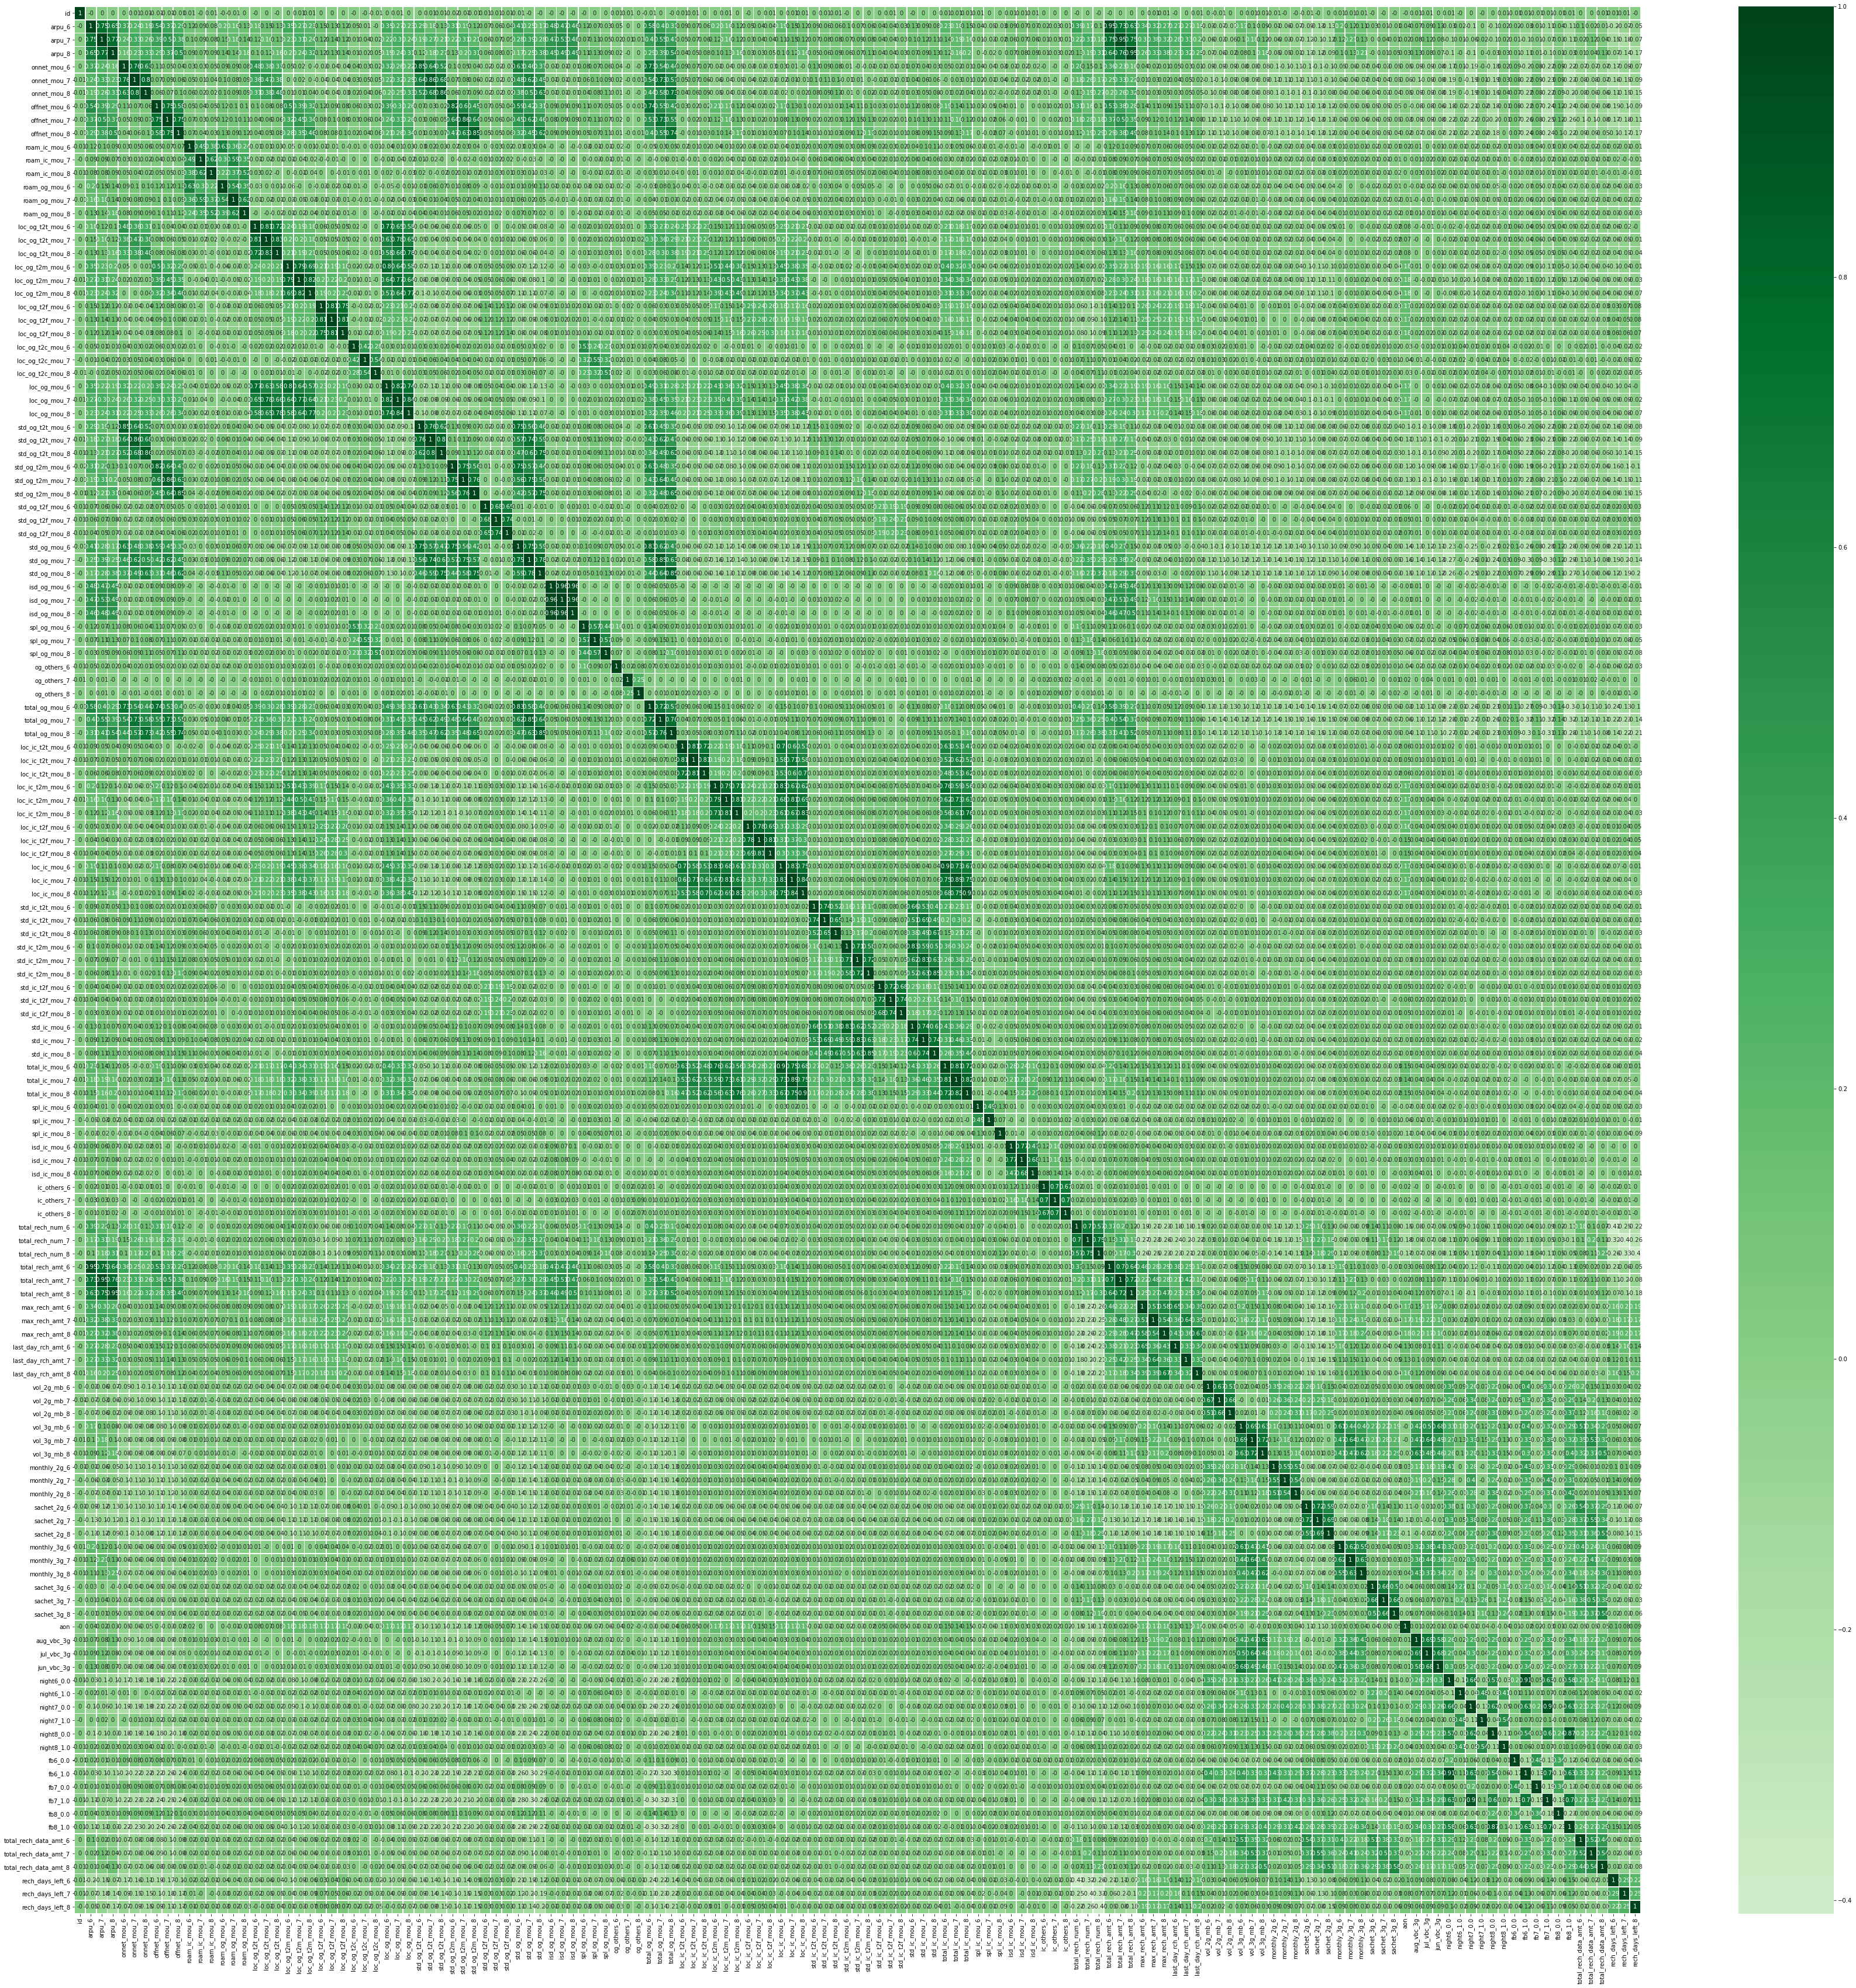

In [130]:
dummy_train = train.drop(['churn_probability'],axis=1)
train_corr = dummy_train.corr()
plt.figure(figsize=(60,60))
sns.heatmap(data=train_corr.round(2),annot=True,cmap='Greens',linewidths=.5,center=0.1)
plt.show()

In [131]:
# Create correlation matrix
corr_matrix = dummy_train.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.80
high_corr_features = [column for column in upper.columns if any(upper[column] > 0.80)]

print("HIGHLY CORRELATED FEATURES IN DATA SET:",len(high_corr_features))
print("Highly Correlated columns are: ",high_corr_features)
      

HIGHLY CORRELATED FEATURES IN DATA SET: 38
Highly Correlated columns are:  ['loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'isd_og_mou_7', 'isd_og_mou_8', 'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8', 'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_8', 'loc_ic_mou_6', 'loc_ic_mou_7', 'loc_ic_mou_8', 'std_ic_mou_6', 'std_ic_mou_7', 'std_ic_mou_8', 'total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8', 'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8', 'fb6_1.0', 'fb7_1.0', 'fb8_1.0']


Observations:- 
1. The data is highly imbalanced. Only 4.6% data is churn.
2. There are 38 features which are highlly correlated.

# Scaling and Modelling

In [132]:
train.shape

(26737, 144)

In [133]:
train.head()

,id,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,...,fb7_0.0,fb7_1.0,fb8_0.0,fb8_1.0,total_rech_data_amt_6,total_rech_data_amt_7,total_rech_data_amt_8,rech_days_left_6,rech_days_left_7,rech_days_left_8
4,4,240.708,128.191,101.565,21.28,4.83,6.13,56.99,38.11,9.63,...,0,1,0,1,1225.0,1337.0,852.0,5.0,5.0,1.0
7,7,167.861,167.869,167.866,0.00,0.00,0.00,0.00,0.00,0.00,...,0,1,0,1,198.0,198.0,198.0,10.0,9.0,3.0
12,12,439.919,397.946,392.024,244.46,108.31,42.98,571.98,727.91,644.43,...,0,0,0,0,0.0,0.0,0.0,1.0,1.0,1.0
15,15,580.549,377.294,338.286,10.43,24.99,194.43,317.11,341.79,197.09,...,0,0,0,1,154.0,0.0,154.0,3.0,6.0,1.0
23,23,1130.948,905.506,479.762,859.53,372.71,0.89,293.46,450.11,386.91,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,9.0


In [134]:
test.shape

(30000, 143)

In [135]:
y = train.pop('churn_probability')
X = train.drop(['id'],axis=1)

In [136]:
X.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,fb7_0.0,fb7_1.0,fb8_0.0,fb8_1.0,total_rech_data_amt_6,total_rech_data_amt_7,total_rech_data_amt_8,rech_days_left_6,rech_days_left_7,rech_days_left_8
4,240.708,128.191,101.565,21.28,4.83,6.13,56.99,38.11,9.63,53.64,...,0,1,0,1,1225.0,1337.0,852.0,5.0,5.0,1.0
7,167.861,167.869,167.866,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0,1,0,1,198.0,198.0,198.0,10.0,9.0,3.0
12,439.919,397.946,392.024,244.46,108.31,42.98,571.98,727.91,644.43,0.00,...,0,0,0,0,0.0,0.0,0.0,1.0,1.0,1.0
15,580.549,377.294,338.286,10.43,24.99,194.43,317.11,341.79,197.09,0.00,...,0,0,0,1,154.0,0.0,154.0,3.0,6.0,1.0
23,1130.948,905.506,479.762,859.53,372.71,0.89,293.46,450.11,386.91,0.00,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,9.0


In [137]:
scaler = preprocessing.StandardScaler().fit(X)
Xscaled = scaler.transform(X)
X

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,fb7_0.0,fb7_1.0,fb8_0.0,fb8_1.0,total_rech_data_amt_6,total_rech_data_amt_7,total_rech_data_amt_8,rech_days_left_6,rech_days_left_7,rech_days_left_8
4,240.708,128.191,101.565,21.28,4.83,6.13,56.99,38.11,9.63,53.64,...,0,1,0,1,1225.0,1337.0,852.0,5.0,5.0,1.0
7,167.861,167.869,167.866,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0,1,0,1,198.0,198.0,198.0,10.0,9.0,3.0
12,439.919,397.946,392.024,244.46,108.31,42.98,571.98,727.91,644.43,0.00,...,0,0,0,0,0.0,0.0,0.0,1.0,1.0,1.0
15,580.549,377.294,338.286,10.43,24.99,194.43,317.11,341.79,197.09,0.00,...,0,0,0,1,154.0,0.0,154.0,3.0,6.0,1.0
23,1130.948,905.506,479.762,859.53,372.71,0.89,293.46,450.11,386.91,0.00,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69990,240.088,474.411,699.991,7.19,16.78,16.41,246.39,809.03,783.66,6.60,...,0,0,0,1,0.0,0.0,56.0,1.0,0.0,1.0
69993,235.524,195.633,129.598,45.08,94.31,8.34,111.51,236.61,91.54,0.00,...,0,1,0,0,2871.0,84.0,0.0,2.0,9.0,2.0
69994,15.760,410.924,329.136,0.00,7.36,10.93,0.00,488.46,381.64,14.96,...,0,1,0,1,0.0,945.0,17.0,12.0,0.0,0.0
69996,372.088,258.374,279.782,77.13,68.44,78.44,335.54,227.94,263.84,0.00,...,0,0,0,0,0.0,0.0,0.0,5.0,1.0,2.0


## Spliting the training dataset

In [138]:
X_train, X_test, y_train, y_test = train_test_split(Xscaled, y, train_size=0.7,random_state=42)

### Balancing the data with oversampling

In [139]:
sm = SMOTE(random_state=100, sampling_strategy='auto')
X_tr,y_tr = sm.fit_resample(X_train,y_train)
print(X_tr.shape)
print(y_tr.shape)

(35716, 142)
(35716,)


### Modelling Using Logistic Regression with PCA 

In [140]:
pca = PCA(random_state=100)
pca.fit(X_tr)

PCA(random_state=100)

In [141]:
df_train_pca = pca.fit_transform(X_tr)
print(df_train_pca.shape)

df_test_pca = pca.transform(X_test)
print(df_test_pca.shape)

(35716, 142)
(8022, 142)


In [142]:
lr = LogisticRegression()
lr.fit(df_train_pca, y_tr)

# Predicted probabilities
y_pred = lr.predict(df_test_pca)
# Converting y_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(y_pred)

In [143]:
print(confusion_matrix(y_test,y_pred))

[[6215 1428]
 [  84  295]]


In [144]:
print("LogisticRegression accuracy with PCA: ",accuracy_score(y_test,y_pred))

LogisticRegression accuracy with PCA:  0.8115183246073299


In [145]:
colnames = list(X.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'PC3':pca.components_[2],'Feature':colnames})
pcs_df.head(10)

,PC1,PC2,PC3,Feature
0,0.146119,0.099157,0.056054,arpu_6
1,0.141487,0.118522,0.066068,arpu_7
2,0.082901,0.145626,0.057380,arpu_8
3,0.209631,-0.051284,-0.065983,onnet_mou_6
4,0.206395,-0.033221,-0.064313,onnet_mou_7
5,0.126129,0.016916,-0.036339,onnet_mou_8
6,0.173376,0.066402,0.029035,offnet_mou_6
7,0.173371,0.073944,0.028373,offnet_mou_7
8,0.101229,0.091918,0.021962,offnet_mou_8
9,0.013484,0.010944,0.395039,roam_ic_mou_6


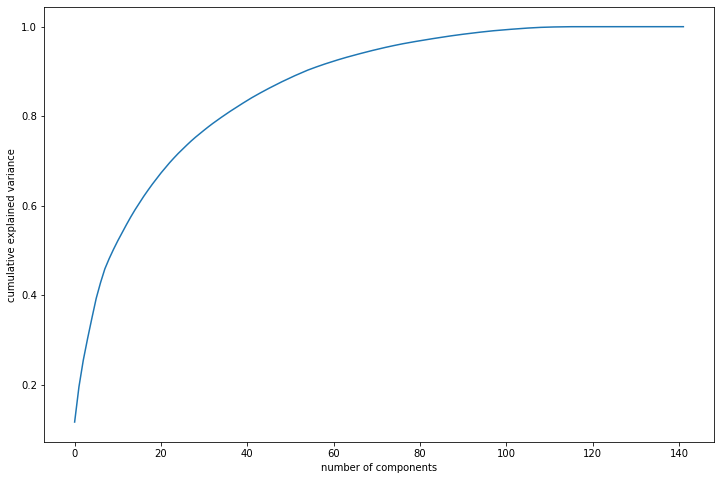

In [146]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [147]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

array([ 11.62,  19.49,  25.42,  30.28,  34.85,  39.28,  42.78,  45.86,
        48.15,  50.22,  52.15,  53.97,  55.75,  57.47,  59.09,  60.59,
        62.07,  63.45,  64.79,  66.06,  67.29,  68.46,  69.59,  70.65,
        71.67,  72.62,  73.55,  74.46,  75.31,  76.11,  76.89,  77.65,
        78.38,  79.08,  79.76,  80.43,  81.08,  81.71,  82.33,  82.94,
        83.54,  84.13,  84.68,  85.22,  85.74,  86.26,  86.76,  87.25,
        87.72,  88.18,  88.64,  89.08,  89.5 ,  89.92,  90.33,  90.69,
        91.04,  91.39,  91.71,  92.02,  92.33,  92.63,  92.92,  93.2 ,
        93.47,  93.73,  93.98,  94.23,  94.48,  94.72,  94.95,  95.18,
        95.4 ,  95.61,  95.81,  96.01,  96.2 ,  96.38,  96.55,  96.72,
        96.88,  97.04,  97.2 ,  97.35,  97.5 ,  97.65,  97.8 ,  97.94,
        98.08,  98.21,  98.33,  98.45,  98.57,  98.69,  98.8 ,  98.91,
        99.01,  99.1 ,  99.19,  99.27,  99.35,  99.43,  99.5 ,  99.57,
        99.64,  99.7 ,  99.76,  99.81,  99.86,  99.9 ,  99.93,  99.95,
      

Oberservations:- 

1. 81.15% accuracy with Logistic Regression default PCA.
2. Key Features are  arpu_6, arpu_7, arpu_8, onnet_mou_6, onnet_mou_7, onnet_mou_8, offnet_mou_6, offnet_mou_7, offnet_mou_8, roam_ic_mou_6

## Trying Different Model to get more accuracy

## Random Forrest with Lasso Correction

### Feature Reduction Using Lasso

In [148]:
lsvc = LinearSVC(C=0.001, penalty="l1", dual=False).fit(X_tr, y_tr)
model = SelectFromModel(lsvc, prefit=True)
X_lasso = model.transform(X_tr)
pos = model.get_support(indices=True)
 ### Feature reduction using RFE
print(X_lasso.shape)

(35716, 46)


In [149]:
lasso_features = list(X.columns[pos])
print("Features identified by LASSO: ", lasso_features)

Features identified by LASSO:  ['arpu_7', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_8', 'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2f_mou_6', 'std_og_mou_6', 'std_og_mou_7', 'spl_og_mou_8', 'total_og_mou_8', 'loc_ic_t2t_mou_7', 'loc_ic_t2f_mou_8', 'loc_ic_mou_7', 'loc_ic_mou_8', 'std_ic_t2t_mou_6', 'total_ic_mou_7', 'total_ic_mou_8', 'spl_ic_mou_7', 'spl_ic_mou_8', 'isd_ic_mou_8', 'total_rech_num_7', 'total_rech_num_8', 'max_rech_amt_8', 'last_day_rch_amt_8', 'vol_2g_mb_8', 'vol_3g_mb_8', 'monthly_2g_6', 'monthly_2g_8', 'sachet_2g_8', 'monthly_3g_8', 'sachet_3g_6', 'sachet_3g_7', 'aon', 'aug_vbc_3g', 'jun_vbc_3g', 'night6_1.0', 'fb8_1.0', 'rech_days_left_7', 'rech_days_left_8']


In [150]:
X_train = X_lasso
y_train = y_tr

In [151]:
X_train.shape

(35716, 46)

### Random Forrest with default parameter tuning

In [152]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [153]:
X_test = pd.DataFrame(data=X_test).iloc[:, pos]

predictions = rfc.predict(X_test)

In [154]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97      7643
           1       0.47      0.54      0.50       379

    accuracy                           0.95      8022
   macro avg       0.73      0.75      0.74      8022
weighted avg       0.95      0.95      0.95      8022



In [155]:
print(confusion_matrix(y_test, predictions))

[[7416  227]
 [ 175  204]]


In [156]:
print(accuracy_score(y_test, predictions))

0.949887808526552


Observations:-

1. Getting 95.0% accuracy.
2. Confusion matix clearly improved a lot, false positives still exist but reduced.

# Getting Predictions for unknown data using Random Forest Model

We have done all the pre processing and data processing of unknown data along with trainning data above. so we can directly use  it get predictions

In [158]:
test = test.fillna(0)
test_null = test.isna().sum()
print(test_null[test_null>0])


Series([], dtype: int64)


In [159]:
X_rtest = test.drop(['id'],axis=1)

In [161]:
X_rscaled = scaler.transform(X_rtest)
X_new = pd.DataFrame(data=X_rscaled).iloc[:, pos]

print(X_new.shape)

(30000, 46)


In [162]:
predictions = rfc.predict(X_new)
predictions

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [163]:
Result = pd.DataFrame(list(zip(test['id'], predictions)), columns =['id', 'churn_probability'])
Result

,id,churn_probability
0,69999,0
1,70000,0
2,70001,1
3,70002,0
4,70003,0
...,...,...
29995,99994,0
29996,99995,0
29997,99996,0
29998,99997,0


In [164]:
Result.to_csv("Final Predictions.csv", sep=',', index=False)